In [3]:
import os
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

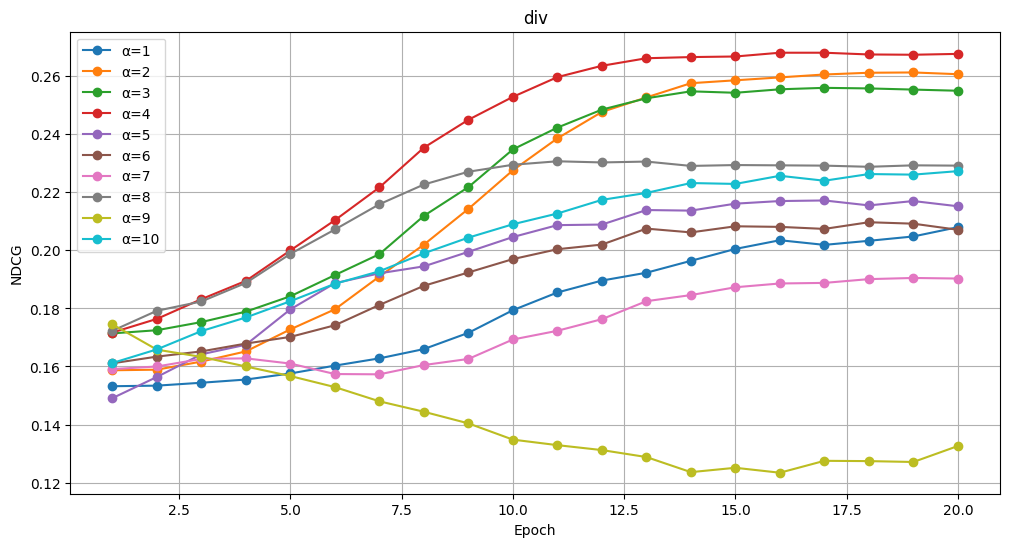

In [50]:
base_path = "..\experiment\hyperparameter_learning\\toys_and_games"
data_name = "Toys_and_Games"
type = "div"
checkpoint_dirs = [f"{base_path}\\{type}\\ckpt_new_ensrec_wgts_{type}{i}_{data_name}" for i in range(1, 11)]

plt.figure(figsize=(12, 6))

for checkpoint_dir in checkpoint_dirs:
    files = []
    for filename in os.listdir(checkpoint_dir):
        filename = filename.split('_')
        files.append((int(filename[0][5:]), float(filename[1][:-4])))
    files.sort()
    epochs, ndcgs = zip(*files)
    plt.plot(epochs, ndcgs, marker='o', label=f"α={checkpoint_dir.split('_')[-4][3:]}")

plt.title(type)
plt.xlabel('Epoch')
plt.ylabel('NDCG')
plt.grid()
plt.legend()
plt.show()

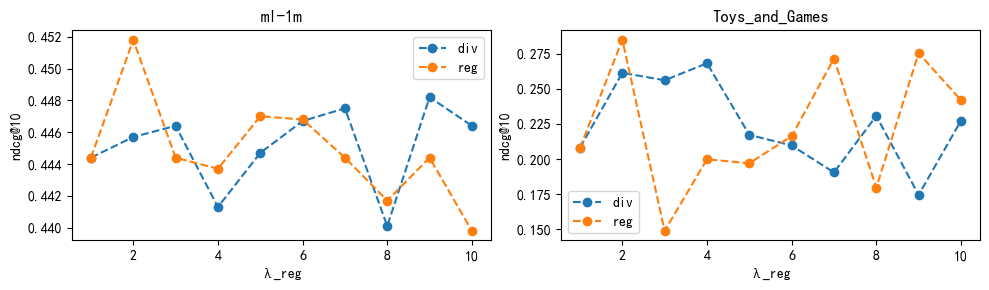

In [25]:
base_path = "..\experiment\hyperparameter_learning\\"
data_names = ['ml-1m', "Toys_and_Games"]
type = ["div", 'reg']

plt.figure(figsize=(10, 3))

for data_name in data_names:
    best_performances = []
    
    for t in type:  # 遍历每种类型
        checkpoint_dirs = [f"{base_path}{data_name}\\{t}\\ckpt_new_ensrec_{t}{i}_{data_name}" for i in range(1, 11)]
        
        for checkpoint_dir in checkpoint_dirs:
            files = []
            for filename in os.listdir(checkpoint_dir):
                filename = filename.split('_')
                files.append((int(filename[0][5:]), float(filename[1][:-4])))
            files.sort()
            epochs, ndcgs = zip(*files)
            best_performance = max(ndcgs)
            best_performances.append(best_performance)

        plt.subplot(1, len(data_names), data_names.index(data_name) + 1)
        plt.plot(range(1, 11), best_performances[-10:], marker='o', label=f"{t}", linestyle='--')  # 只绘制当前类型的表现
        plt.title(data_name)
        plt.xlabel('λ_' + t)
        plt.ylabel('ndcg@10')
        plt.grid()
        plt.legend()

plt.tight_layout()
plt.show()